# Problem

To To cluster wine based on the different checmical composition values. We will be using k-means clustering to solve this problem. The attributes that will be used are as follows,

1. Alcohol
2. Malic Acid
3. Ash
4. Acalinity of Ash
5. Manganesium
6. Total phenols
7. Flavanoids
8. NonFlavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline
14. ClassLabel(y)

All the above columns are continuous values. 

# Process Flow

We will follow the below steps to cluster the data,

1. Reading the Data.
2. Data Cleaning.
3. Data Exploration & Feature Engineering.
4. Identifying number of clusters using ELBOW METHOD.
5. Modelling data using K-means clustering.

So let's begin with reading data into dataframe.

## Reading Data

We will be using Pandas libraby to read data.

In [1]:
import pandas as pd

column_list=['class','Alcohol','Malic Acid','Ash','Acalinity of Ash','Manganesium','Total phenols','Flavanoids','NonFlavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

data = pd.read_csv(r'C:\Users\satis\Desktop\BigData - Assigsnment 1\Assignment2\data\wine.csv', names=column_list)


#dropping the class column as we want to predict them.
y= data['class']

data.drop(['class'],axis=1,inplace=True)

In [2]:
data.head()

,Alcohol,Malic Acid,Ash,Acalinity of Ash,Manganesium,Total phenols,Flavanoids,NonFlavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Data cleaning

## Checking for null values

In [5]:
data.isna().sum()

Alcohol                         0
Malic Acid                      0
Ash                             0
Acalinity of Ash                0
Manganesium                     0
Total phenols                   0
Flavanoids                      0
NonFlavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

We do not have any null values but we need to check for any discrepencies in data.

## Identifying and Removing outliers

Removing outliers is an important task in data cleaning and w.r.t to clustering it plays a major role as it removes values that would not belong to any cluster or it will complicate the boundary of the clusters. Lets plot box plot to visualize the outlier.

In [6]:
columns = data.columns.tolist()

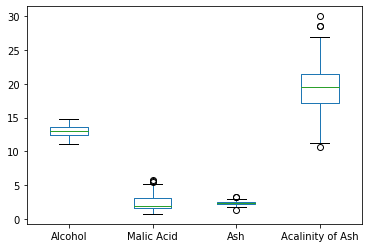

In [7]:
data[columns[0:4]].plot(kind='box')

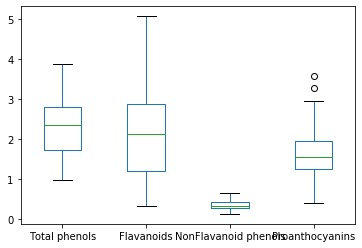

In [8]:
data[columns[5:9]].plot(kind='box')

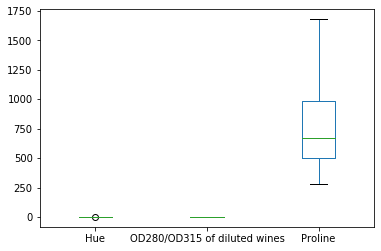

In [9]:
data[columns[10:13]].plot(kind='box')

As we can see that the outlier are considerably in small numbers. So we willl not be removing them as they will be assigned to some cluster and it wont impact the overall outcome.

## Feature Engineering

First, Let's check the correlation between the features.

In [10]:
corr_matrix=data.corr().abs()

corr_matrix

,Alcohol,Malic Acid,Ash,Acalinity of Ash,Manganesium,Total phenols,Flavanoids,NonFlavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,0.310235,0.270798,0.289101,0.236815,0.155929,0.136698,0.546364,0.071747,0.072343,0.643720
Malic Acid,0.094397,1.000000,0.164045,0.288500,0.054575,0.335167,0.411007,0.292977,0.220746,0.248985,0.561296,0.368710,0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,0.074667,0.003911,0.223626
Acalinity of Ash,0.310235,0.288500,0.443367,1.000000,0.083333,0.321113,0.351370,0.361922,0.197327,0.018732,0.273955,0.276769,0.440597
Manganesium,0.270798,0.054575,0.286587,0.083333,1.000000,0.214401,0.195784,0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,0.335167,0.128980,0.321113,0.214401,1.000000,0.864564,0.449935,0.612413,0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,0.411007,0.115077,0.351370,0.195784,0.864564,1.000000,0.537900,0.652692,0.172379,0.543479,0.787194,0.494193
NonFlavanoid phenols,0.155929,0.292977,0.186230,0.361922,0.256294,0.449935,0.537900,1.000000,0.365845,0.139057,0.262640,0.503270,0.311385
Proanthocyanins,0.136698,0.220746,0.009652,0.197327,0.236441,0.612413,0.652692,0.365845,1.000000,0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,0.055136,0.172379,0.139057,0.025250,1.000000,0.521813,0.428815,0.316100


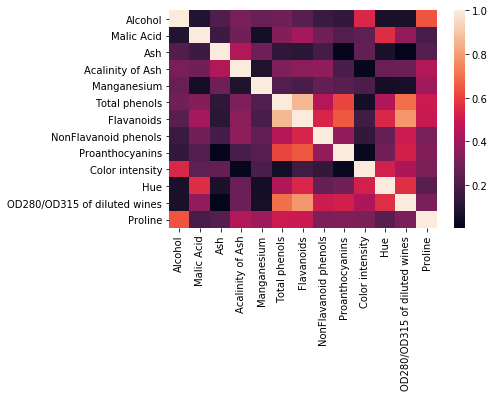

In [11]:
import seaborn as sns
import numpy as np


sns.heatmap(corr_matrix, 
        xticklabels=data.columns,
        yticklabels=data.columns)

From the above heatmap, we can observe that only 2 columns are co-related with each other viz. Flavanoids and Total Phenol. The score is 0.86 approx. but it does not satisfy the threshold value that we set that is 0.95. So we will not be removing any columns from the dataframe.

Let's analyze our data. We will use describe function to check the magnitude of all columns. After analysis, if required, we will scale the columns to common magnitude.

In [12]:
data.describe()

,Alcohol,Malic Acid,Ash,Acalinity of Ash,Manganesium,Total phenols,Flavanoids,NonFlavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


For the above statistics, we can see that some columns have higher magnitudes compared to other columns. For e.g. Manganesium & Proline. Since k-mean is based on distances, if the magnitude varies, it will affect the output directly. So its important to bring all the columns to same scale.

In [13]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## Modelling

Lets go ahead and apply our k-means clustering model. But before we do that, we need to identify the optimal number of clusters for our datasets. We can do that using **ELBOW METHOD**.

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions=[]

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

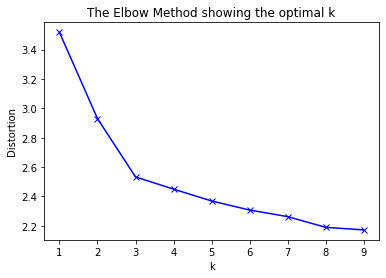

In [15]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 Based on the above graph, we can see that at k=3, the graph converges and creates an elbow. So we will be using **number of clusters(K) equal to 3**.

## Visualization before clustering

Lets plot the data before we apply k-means on the data. Plotting 13 columns together will be a very difficult task. Hence we need to perform dimensionality reduction to reduce it to 2 dimensions. This 2 dimension will be equivalent to 13 dimensions.

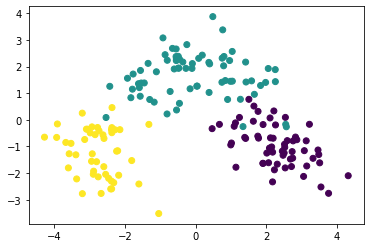

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pylab as pl
iris = load_iris()
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)
pl.figure('Reference Plot')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)

### Let apply k-means clustering on our dataset

In [17]:
#define k_mean object with different hyperparamter.
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 100, random_state = 5)

In [18]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [19]:
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [24]:
kmeans.labels_+1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

## Visulaizing after clustering

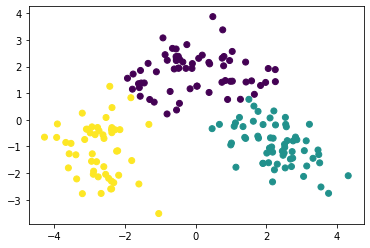

In [21]:
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()

## Verifying K with our output variable (y)

In [22]:
y.unique()

array([1, 2, 3], dtype=int64)

As we can see that the unique classes of wine are 3 and our number of clusters are also 3. Hence our centroid calculation and model training worked successfully.

## Appendix

There is an another way to identify k for k-means. It can be calculated using inertia for the model. Following graph depicts the inertia for our data.

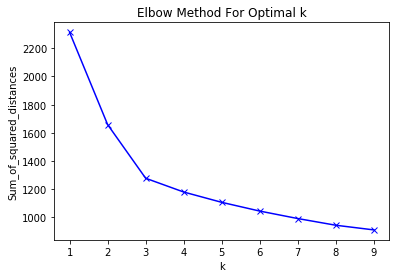

In [23]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see from the above graph, the plot converges at k=3 and forms an elbow. So we can use either distortion or inertia.